# Programming Assignment #3

<font color="red"> <b> Due: May 9  EOD</b> </font>

<font color="blue"> Nanduri Ananth Deepak Sharma </font>

# I. Introduction

## Objective

### The objective of this assignment is to import the data from "https://archive.ics.uci.edu/ml/datasets/cnae-9" and train an SVM with varying the kernel and also by applying principal component analysis to the input data and repeating the training process and compare the results acheived by the different models.


# II. Data

You may choose one of the following three datasets to work on. Introduce your data and visualize them. Describe your observations about the data. 
1. https://archive.ics.uci.edu/ml/datasets/covertype
2. https://archive.ics.uci.edu/ml/datasets/cnae-9
3. https://archive.ics.uci.edu/ml/datasets/Activity+recognition+using+wearable+physiological+measurements (DL Link - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6960825/bin/sensors-19-05524-s001.zip )


# III. Method

In the earlier assignment you had to implement Least Mean Square Classifier, Fisher Linear Discriminant, Perceptron,logistic regression, and Neural Network. In this assignment your tasks are the followings:

1. Implement both SVM and Kernel SVM and report the classification performance of the classifiers on the original dataset.
2. Use PCA to reduce the feature representation to a more compact version that may be of size: 10%, 15%, 20%, 25%, and 30% of the originial dataset dimension.
3. Compare the performance of the classifier using the PCA reduced descriptor and the original feature descriptor.

Do not forget to explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 

Each implementation will be followed by a separate markdown cell that should include
 - your implementation description
 - Review of the classification model implemented.
 - Plots or metrics to show the performance of the algorithm


### Grading Rubric (100 Points)
1. Loading dataset, preprocessing, splitting and visualization- 15 Points
2. SVM - 20 Points
3. Kernel SVM - 20 Points
4. PCA Dimensionality Reduction - 25 Points
5. SVM and Kernel SVM using PCA reduced features - 10 Points
6. Results Comparison - 10 Points


### Method

In [75]:
import numpy as np
import abc

## Loading the dataset, preprocessing, splitting and visualization*

data = np.genfromtxt("CNAE-9.data", dtype = int, encoding =None, delimiter = ",")
len(data)

1080

In [76]:

X  = data[:,1:]
y = data[:,0]
print("Shape of X is :", X.shape, "Shape of y is : ", y.shape)
num_of_records = len(X)
num_of_features = len(X[0])
print("Number of Records is :", X.shape, "Number of Features is : ", y.shape)


Shape of X is : (1080, 856) Shape of y is :  (1080,)
Number of Records is : (1080, 856) Number of Features is :  (1080,)


## Splitting the label and X from the Raw data

#### As the first column of the array contains the labels we separate them into two different arrays

In [77]:
# Splitting the data into train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 2)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (756, 856)
X_test shape:  (324, 856)
y_train shape:  (756,)
y_test shape:  (324,)


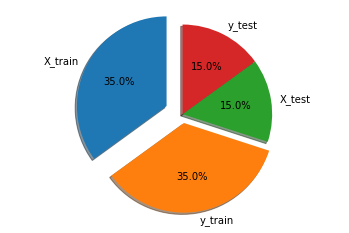

In [78]:
labels = 'X_train','y_train', 'X_test',  'y_test'
sizes = [len(X_train), len(y_train), len(X_test),  len(y_test)]
explode = (0.2, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1pie, ax1pie = plt.subplots()
ax1pie.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1pie.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Splitting the data into train and test splits

#### We shall now split the data into test and training splits and our test split contains 30 percent of the input data, For this we use the inbuilt methods in the model_selection package of the sklearn module.

In [79]:
############# ---------  SVM  ----------- #################


from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_score_svm = accuracy_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm, average= None)
print("Accuracy score of SVM :", accuracy_score_svm)
print("F1 score of SVM :", f1_score_svm)


Accuracy score of SVM : 0.8487654320987654
F1 score of SVM : [0.94545455 0.95384615 0.87356322 0.67567568 0.94339623 0.8115942
 0.90140845 0.94252874 0.66666667]


## Importing the SVM from Sklearn and fitting using the training data

We use the SVC module from the svm package of sklearn and use the inbuilt methods fit() method to train the model and the predict() method to predict the outcome for the test sample


In [80]:
############# -------  SVM Kernel  -------- #################

svm_kernel = SVC(kernel= 'linear')
svm_kernel.fit(X_train, y_train)
y_pred_svm_kernel = svm_kernel.predict(X_test)
accuracy_score_svm_kernel = accuracy_score(y_test, y_pred_svm_kernel)
f1_score_svm_kernel = f1_score(y_test, y_pred_svm_kernel, average= None)
print("Accuracy score of SVM with linear Kernel:", accuracy_score_svm_kernel)
print("F1 score of SVM with linear Kernel:", f1_score_svm_kernel)

Accuracy score of SVM with linear Kernel: 0.9320987654320988
F1 score of SVM with linear Kernel: [0.96428571 0.91666667 0.95555556 0.88235294 1.         0.87671233
 0.97297297 0.97777778 0.84057971]


## Importing the SVM from Sklearn and fitting using the training data

We use the SVC module from the svm package of sklearn while setting the kernel argument to "linear" and use the inbuilt methods fit() method to train the model and the predict() method to predict the outcome for the test sample

In [81]:
############# -  Dimensionality Reduction - #################

# Importing PCA from sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components = 257)
pca.fit(X)
X_train_pca, X_test_pca = pca.transform(X_train), pca.transform(X_test)
print("######### After Dimensionality Reduction #########")
print("X_train_pca shape: ", X_train_pca.shape)
print("X_test_pca shape: ", X_test_pca.shape)



######### After Dimensionality Reduction #########
X_train_pca shape:  (756, 257)
X_test_pca shape:  (324, 257)


## Dimensionality reduction using PCA 

The input data is of 857 dimensions, so we use the PCA module of decomposition library from sklearn and reduce the Dimensionality to 257 principal components which is 30% of the number of features.

In [82]:
######## ----------   SVM and SVM Kernel  -------- ###########

# SVM 

svm_model_pca = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_model_pca.fit(X_train_pca, y_train)
y_pred_svm_pca = svm_model_pca.predict(X_test_pca)
accuracy_score_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
print("Accuracy score of SVM :", accuracy_score_svm_pca)
f1_score_svm_pca = f1_score(y_test, y_pred_svm_pca, average= None)
print("F1 score of SVM :", f1_score_svm_pca)

## Kernel SVM

svm_kernel_pca = SVC(kernel= 'linear')
svm_kernel_pca.fit(X_train_pca, y_train)
y_pred_svm_kernel_pca = svm_kernel_pca.predict(X_test_pca)
accuracy_score_svm_kernel_pca = accuracy_score(y_test, y_pred_svm_kernel_pca)
print("Accuracy score of SVM with linear Kernel:", accuracy_score_svm_kernel_pca)
f1_score_svm_kernel_pca = f1_score(y_test, y_pred_svm_kernel_pca, average= None)
print("F1 score of SVM with linear Kernel:", f1_score_svm_kernel_pca)

Accuracy score of SVM : 0.8148148148148148
F1 score of SVM : [0.94339623 0.62135922 0.86666667 0.76666667 0.90196078 0.8
 0.8358209  0.92134831 0.76923077]
Accuracy score of SVM with linear Kernel: 0.9259259259259259
F1 score of SVM with linear Kernel: [0.96428571 0.90410959 0.93333333 0.86956522 1.         0.85714286
 0.97297297 0.97777778 0.85714286]


## Importing the SVM from Sklearn and fitting using the dimensionality reduced training data

As we have reduced the dimensionality of the data, we shall now train different models with that data and analyse the results.

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

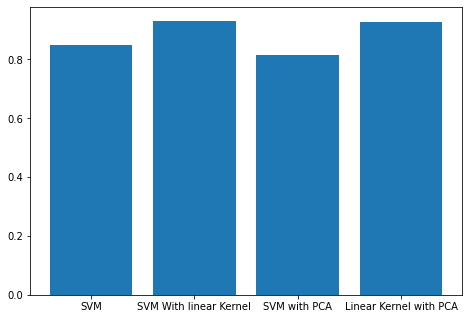

In [83]:
######### ------  Visualization of Results ------- ############

accuracy_score_list = [accuracy_score_svm,accuracy_score_svm_kernel, accuracy_score_svm_pca, accuracy_score_svm_kernel_pca]
f1_score_list = [f1_score_svm, f1_score_svm_kernel, f1_score_svm_pca, f1_score_svm_kernel_pca]
model_name_list = ["SVM", "SVM With linear Kernel", "SVM with PCA", "Linear Kernel with PCA"]

# Importing matplotlib for visualization
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(model_name_list,accuracy_score_list)
plt.show()


In [84]:
print(accuracy_score_list)

[0.8487654320987654, 0.9320987654320988, 0.8148148148148148, 0.9259259259259259]


## Comparision of Accuracy scores:

We shall create a list which stores the accuracy score of all the models that we trained and another list to store the F1 Scores. We shall then plot them on a bar plot to see which does better. In the above figure we can see that the SVM model with linear kernel did better than all the other models.

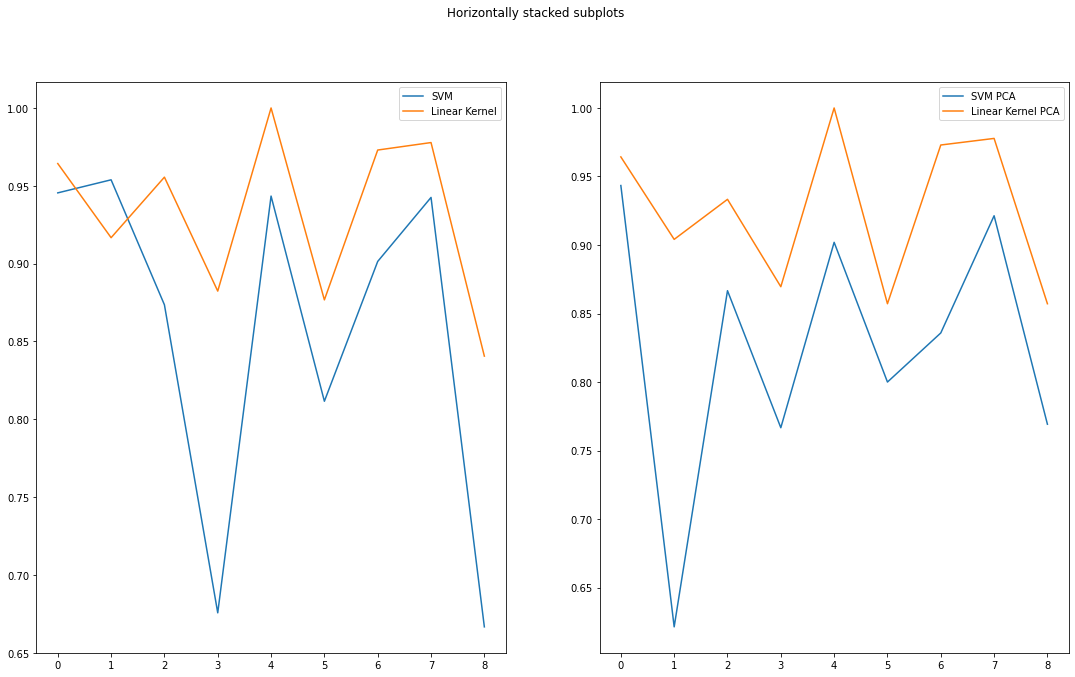

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(range(0,9), f1_score_svm)
ax1.plot( range(0,9), f1_score_svm_kernel)
ax1.legend(["SVM", "Linear Kernel"])
ax2.plot( range(0,9), f1_score_svm_pca)
ax2.plot( range(0,9), f1_score_svm_kernel_pca)
ax2.legend(["SVM PCA", "Linear Kernel PCA"])

In [86]:
k = -1
for i in f1_score_list:
    k+=1
    print("Average F1 Score for",model_name_list[k]," is :",np.mean(i))

Average F1 Score for SVM  is : 0.8571259861871001
Average F1 Score for SVM With linear Kernel  is : 0.931878185260801
Average F1 Score for SVM with PCA  is : 0.8251610607470026
Average F1 Score for Linear Kernel with PCA  is : 0.9262589243431015


## Comparision of F1 scores:

As we have already have a list which stores the f1 scores for each model class wise in a list, we shall now plot them in two different plots to compare their performance classwise. Even for this metric SVM with linear kernel does better than all.

# Conclusions

### Summarize your work here. <br>
    So we have implemented and analysed the support vector machine(SVM) model with a linear kernel and trained the models. Testing the model on the testing data set, we observed that accuracy score improved and F1 score improved in the case of linear kernel.
    Then we reduced the dimensionality of the input data set to 100 components Whichin case of raw data was 856 and tarined the 2 models separately, upon analysis we have seen that the accuracy score drops when compared to the linear model for the whole dimensional data but does better than the simple SVM. Even after using the linear kernel the results were not better than whole dimensional model.
    
### Which classifier do you think the best? 

    I feel the SVM with linear kernel is the better one among all for this dataset, the results might vary depending upon the train test split and dimensionalityreduction, so more analysis can be done to find out which is the better model among all.

### Discuss the challenges or somethat that you learned. 

    I have no challenges while doing this assignment, but I could explore more on data visualization techniques which lets me visualize more complex phases. 
    
### If you have any suggestion about the assignment, you can write about it.

    If given a task to reduce the dimensions to 3 different values - Dimensionality reduction by Principal component analysis can be done in a loop which iterates over the number of n_components which makes it easy to select a better model.

# References

[1] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html <br>
[2] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html <br>
[3] https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics <br>
[4] https://www.tutorialspoint.com/matplotlib/index.htm <br>

